# 목차
### 1. KNN 회귀분석
### 2. 평균제곱근 오차 실습
### 3. 선형회귀
### 4. 보스턴 주택 가격 예측
### 5. 릿지 회귀
### 6. 라쏘(lasso) 회귀(Regression)
### 7. IRIS 로지스틱 회귀 분류
### 8. 로지스틱 분류, svm분류
### 9. cancer data 분류: malignant vs benign

#### 특이사항 정리 + 고찰
#### 1. KNN 회귀분석
- score 함수는 결정계수를 return해줌
- knn 회귀분석에서 test size를 변경 시, 결정계수 값의 차이가 크다.
- sample 수가 작아서 변동폭이 크다고 생각되어, sample을 10000으로 늘려서 여러 경우를 테스트해 본 결과, 결정 계수가 안정적으로, 0.6~ 0.7사이에서 결과가 나온다.

#### 2. 평균 제곱근 오차
#### 3. 선형회귀
- coef는 기울기를 나타내고, intercept는 절편을 나타냄

#### 3.1 knn과 선형 회귀 비교
- ax.spines는 축 설정하는 함수

#### 4. 보스턴 주택 가격 예측
- plt.scatter의 s인자는 마커의 크기를 설정한다.

#### 4.1 보스턴 확장 데이터
- colum을 확장한 보스턴 데이터
- knn의 이웃 수가 작을 수록, train과 test의 score가 같이 높아지고 있음

#### 5. 릿지 회귀
- 테스트 세트에 과적합 되는 것을 방지하고 있음. linear, knn과 비교하여 training과 test차이가 작음
- extended bostondata에서 0.5에서 0.1사이의 alpha값이 가장 좋은 test set 성능을 보임
- 그래프 그릴 때, x값 생략시, 자동으로 0부터 차례로 index를 넣어줌

#### 6. 라쏘 회귀
 - print(lasso.coef_ != 0)는 true false값이기 때문에 특성의 값을 구할 수 있음

#### 7. IRIS 로지스틱 회귀 분류
#### 8. 로지스틱 분류, svm분류
#### 9. cancer data 분류: malignant vs benign
- 규제 c는 역수가 임. 100 => 1/100 penalty가 적용됨

# 1. KNN 회귀 분석(regression)

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preamble import *

%matplotlib inline


In [2]:
#맥에서 폰트문제 해결하기
from matplotlib import rc
rc('font', family="AppleGothic")

## 첫 번째 knn회귀 실험

In [3]:
X, y =mglearn.datasets.make_wave(n_samples=40)

# 훈련세트와 테스트세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors =3)

#훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print("테스트 세트 예륵:\n{}".format(reg.predict(X_test)))

테스트 세트 예륵:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [5]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


## 두 번째 knn회귀 실험 


In [6]:
X, y =mglearn.datasets.make_wave(n_samples=10000)

# 훈련세트와 테스트세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.5)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors =3)

#훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("테스트 세트 예륵:\n{}".format(reg.predict(X_test)))

테스트 세트 예륵:
[ 1.049 -0.075  1.154 ... -1.434 -0.59   0.221]


In [8]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.67


## 참고할 neighbor 수를 변경하여, 성능 측정

In [9]:
X, y =mglearn.datasets.make_wave(n_samples=40)

# 훈련세트와 테스트세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0, test_size=0.2)

X_train.shpae: (32, 1) X_test.shape: (8, 1)
X_train.shpae: (32, 1) X_test.shape: (8, 1)
X_train.shpae: (32, 1) X_test.shape: (8, 1)


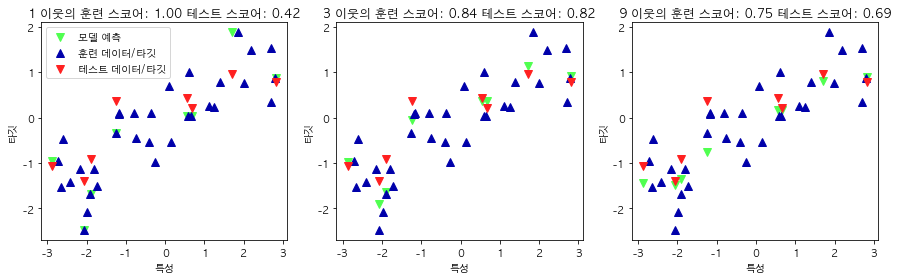

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

#이웃 수를 1, 3, 9로 변경하여 성능 test
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    print("X_train.shpae: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃","테스트 데이터/타깃"], loc="best")


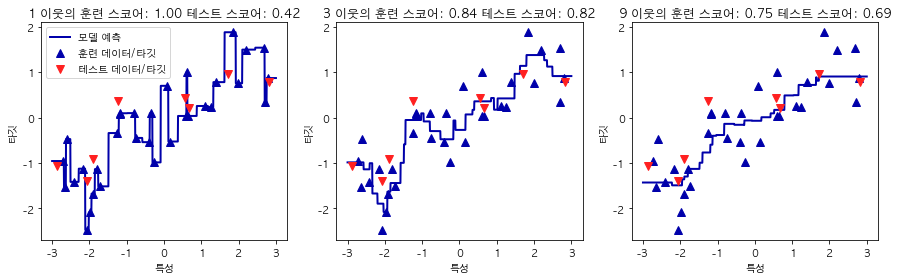

In [11]:
# 임의의 값을 넣어서(-3 부터 3까지 1000개의 데이터 생성), 모델 예측 line 넣기
fig, axes = plt.subplots(1,3, figsize=(15,4))
# -3과 3 사이에 1000개의 데이터 포이트를 만든다
line = np.linspace(-3,3,1000).reshape(-1,1)

#이웃 수를 1, 3, 9로 변경하여 성능 test
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃","테스트 데이터/타깃"], loc="best")

# 2. 평균 제곱오차 실습

In [12]:
import numpy as np

#기울기 a와 y절편 b
ab = [3, 76]

# x,y의 데이터 값
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수

def predict(x):
    return ab[0]*x + ab[1]

In [13]:
#RMSE 함수
def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

#RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    #predict_result 리스트 완성
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" %(x[i], y[i], predict(x[i])))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100


In [14]:
# 최종 RMSE 출력
print("rmse 최종값: ", str(rmse_val(predict_result, y)))

rmse 최종값:  3.3166247903554


# 3. 선형회귀

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [17]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [18]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


# 3.1 선형회귀와 knn비교

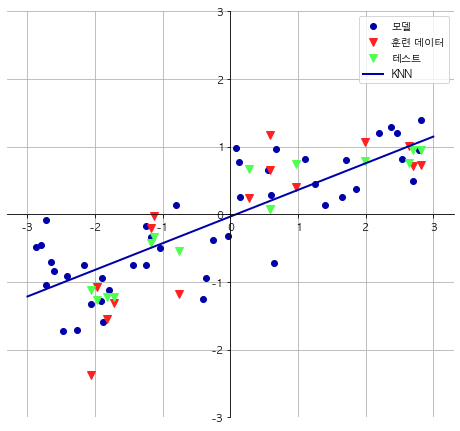

In [19]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
line = np.linspace(-3,3,1000).reshape(-1,1)

plt.figure(figsize=(8,8))

#훈련셋
plt.plot(X_train, y_train, "o", c= mglearn.cm2(0))

#테스트셋
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1) ,markersize = 8)

#knn예측
plt.plot(X_test, reg.predict(X_test), "v", c=mglearn.cm3(2),markersize =8)

#linearregression예측
plt.plot(line, lr.predict(line))

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3,3)
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"],loc = "best")
ax.grid(True)
ax.set_aspect('equal')


# 보스턴 주택 가격 예측

In [20]:
#데이터 확인
from sklearn.datasets import load_boston
boston= load_boston()

print("boston.keys(): {}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름: \n {} \n".format(boston.feature_names))

df = pd.DataFrame(boston.data, columns = boston.feature_names)
print(df.head())

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

       CRIM    ZN  INDUS  CHAS  ...    TAX  PTRATIO       B  LSTAT
0  6.32e-03  18.0   2.31   0.0  ...  296.0     15.3  396.90   4.98
1  2.73e-02   0.0   7.07   0.0  ...  242.0     17.8  396.90   9.14
2  2.73e-02   0.0   7.07   0.0  ...  242.0     17.8  392.83   4.03
3  3.24e-02   0.0   2.18   0.0  ...  222.0     18.7  394.63   2.94
4  6.91e-02   0.0   2.18   0.0  ...  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [21]:
boston.data[:,5].shape

(506,)

In [22]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

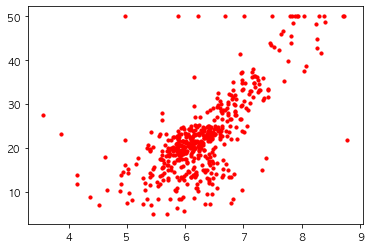

In [23]:
# 방의 개수와 산점도
plt.scatter(boston.data[:,5], boston.target, color="r", s=10)

In [24]:
# attribute 하나로, linear regression 실험
X = boston.data[:, 5]
print(X.shape)

(506,)


In [25]:
X

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [26]:
# LinearRegression의 함수에 인자로 전달하기 위해서는 
#각 원소의 값이 담긴 2차원 배열을 (n,1)의 형태로 만들어야 함, atleat_2d 함수는 x데이터를 2차우너 배열을 (1,n)형태로 만들어줌

In [27]:
X_1 = np.atleast_2d(X)

In [28]:
X_1.shape

(1, 506)

In [29]:
X_2 =np.transpose(X_1)
print(X_2.shape)

(506, 1)


In [30]:
y = boston.target
lr.fit(X_2, y)

y_predicted = lr.predict(X_2)

In [31]:
print("w[0]: %f b: %f"%(lr.coef_[0],lr.intercept_))

w[0]: 9.102109 b: -34.670621


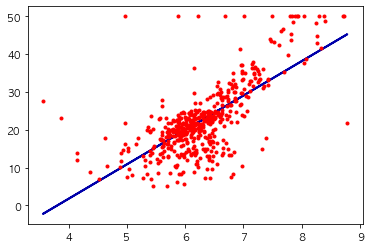

In [32]:
#모델 그래프로 그리기
plt.plot(X_2, y_predicted)
plt.plot(X_2,y,'o',color='r',markersize=3)

In [33]:
#선형회귀 모델, 성능측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape: (127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [34]:
#KNN모델, 성능 측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
kn = KNeighborsRegressor(n_neighbors =3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(kn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(kn.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape: (127, 13)
훈련 세트 점수: 0.78
테스트 세트 점수: 0.51


# 보스톤 확장 데이터

In [35]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))



X.shape: (506, 104)


In [36]:
#선형회귀 모형 성능측정
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 104) X_test.shape: (127, 104)
훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [37]:
#KNN모델, 성능 측정
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
kn = KNeighborsRegressor(n_neighbors =3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(kn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(kn.score(X_test, y_test)))

X_train.shape: (379, 104) X_test.shape: (127, 104)
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [38]:
#과대적합 피하도록 파라미터 조정해보기
print("선형모델")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.5)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print("KNN모델")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))
for i in range(1, 15):
    kn = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    print("이웃수: {}".format(i))
    print("훈련 세트 점수: {:.2f}".format(kn.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(kn.score(X_test, y_test)))


선형모델
X_train.shape: (253, 104) X_test.shape: (253, 104)
훈련 세트 점수: 0.97
테스트 세트 점수: 0.66
KNN모델
X_train.shape: (379, 104) X_test.shape: (127, 104)
이웃수: 1
훈련 세트 점수: 1.00
테스트 세트 점수: 0.65
이웃수: 2
훈련 세트 점수: 0.94
테스트 세트 점수: 0.65
이웃수: 3
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61
이웃수: 4
훈련 세트 점수: 0.87
테스트 세트 점수: 0.60
이웃수: 5
훈련 세트 점수: 0.83
테스트 세트 점수: 0.56
이웃수: 6
훈련 세트 점수: 0.81
테스트 세트 점수: 0.56
이웃수: 7
훈련 세트 점수: 0.80
테스트 세트 점수: 0.54
이웃수: 8
훈련 세트 점수: 0.78
테스트 세트 점수: 0.56
이웃수: 9
훈련 세트 점수: 0.76
테스트 세트 점수: 0.55
이웃수: 10
훈련 세트 점수: 0.75
테스트 세트 점수: 0.54
이웃수: 11
훈련 세트 점수: 0.74
테스트 세트 점수: 0.52
이웃수: 12
훈련 세트 점수: 0.73
테스트 세트 점수: 0.53
이웃수: 13
훈련 세트 점수: 0.72
테스트 세트 점수: 0.53
이웃수: 14
훈련 세트 점수: 0.72
테스트 세트 점수: 0.52


# 릿지 회귀(Ridge Regression)

In [39]:
# 가중치의 절댇값을 가능한 작게
# w의 모든 원소가 0에 가깝게 하기
# 모든 특성이 출력에 주는 형향을 최소한으로 만들기
# 기울기를 작게 규제/제약

In [40]:
# test data에 과적합 되지 않게 하는게 핵심임
# 패널티가 0이면 효과가 없고 무한으로 늘어날 수록 penalty가 커짐
# 어떤 특징을 많이 고려하지 않고, 비슷하게 반영하고 싶을 떄 사용
# default 값은 1임

In [41]:
from sklearn.linear_model import Ridge

In [42]:
#데이터 불러오기
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X.shape: {}".format(X.shape))
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))


X.shape: (506, 104)
X_train.shape: (379, 104) X_test.shape: (127, 104)


In [43]:
print("릿지 회귀")
ridge = Ridge().fit(X_train, y_train) # penalty가 default로 1로 적용되어 있음
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

릿지 회귀
훈련 세트 점수: 0.89
훈련 세트 점수: 0.75


In [44]:
print("선형 회귀")
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

선형 회귀
훈련 세트 점수: 0.95
훈련 세트 점수: 0.61


In [45]:
print("KNN 회귀")
knn = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

KNN 회귀
훈련 세트 점수: 0.90
훈련 세트 점수: 0.61


In [46]:
# alpha 값에 따른 결과값 분석
for i in [10, 5, 0.5, 0.3, 0.2, 0.1, 0.01]:
    print("릿지 회귀 alpah값: "+ str(i))
    ridge = Ridge(alpha = i).fit(X_train, y_train)
    print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
    print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

릿지 회귀 alpah값: 10
훈련 세트 점수: 0.79
훈련 세트 점수: 0.64
릿지 회귀 alpah값: 5
훈련 세트 점수: 0.82
훈련 세트 점수: 0.68
릿지 회귀 alpah값: 0.5
훈련 세트 점수: 0.90
훈련 세트 점수: 0.77
릿지 회귀 alpah값: 0.3
훈련 세트 점수: 0.91
훈련 세트 점수: 0.77
릿지 회귀 alpah값: 0.2
훈련 세트 점수: 0.92
훈련 세트 점수: 0.77
릿지 회귀 alpah값: 0.1
훈련 세트 점수: 0.93
훈련 세트 점수: 0.77
릿지 회귀 alpah값: 0.01
훈련 세트 점수: 0.94
훈련 세트 점수: 0.70


In [47]:
print(ridge.coef_)

[ -2.353  -9.15  -28.626  -8.749  -3.706  37.011  27.448 -19.65   16.147
  -3.225   2.37   17.165  -5.998   9.682   0.302   2.131  27.289 -10.704
  13.796 -12.566   4.61   -5.945  -2.343  -4.372  -0.278   9.614   1.006
  -3.466   3.871 -16.602   5.437  -1.974  -6.727   1.669  13.071  -0.014
   7.977  -8.68   16.275   0.662  20.767  20.457  10.618  14.494  13.09
  11.568 -10.908  -3.045 -22.37   -8.749 -15.841 -25.862   8.635  -2.86
   9.115   1.743  -4.42   36.147 -13.273  -2.928   9.47  -13.661  11.867
 -10.506   2.531 -14.277   3.398  15.357  18.901 -30.239  12.517  -7.424
 -32.728 -27.035  10.175  -5.529   0.964   4.485  27.178 -18.083  -1.864
 -14.516 -23.23   29.564   2.705   1.057  -8.491 -25.004  13.367 -34.38
  34.11   -2.649 -13.014 -18.273  -4.716  20.032   3.992  -8.695   3.597
   7.451   8.875   0.177  -4.542  30.642]


xlims[0]은 무슨값이 나올까 
-5.15
xlims[1]은 무슨값이 나올까 
108.15


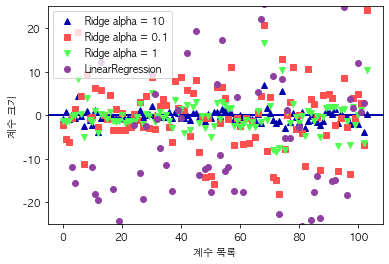

In [48]:
# 도식화 해보기
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
ridge = Ridge(alpha = 1).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)


plt.plot(ridge10.coef_, '^', label ="Ridge alpha = 10")
plt.plot(ridge01.coef_, 's', label ="Ridge alpha = 0.1")
plt.plot(ridge.coef_, 'v', label ="Ridge alpha = 1")
plt.plot(lr.coef_, 'o', label ="LinearRegression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

print("xlims[0]은 무슨값이 나올까 \n" + str(xlims[0]))
print("xlims[1]은 무슨값이 나올까 \n" + str(xlims[1]))

In [49]:
# 라쏘(lasso) 회귀
#가중치의 영향을 최소화 할 수 있음
# 가중치가 0 이될 수 있음, 특징을 선별해서 해석력을 보인다는 말임, 몇 가지 특성을 완전 제거할 떄



In [50]:
from sklearn.linear_model import Lasso

In [51]:
#데이터 불러오기
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X.shape: {}".format(X.shape))
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))


X.shape: (506, 104)
X_train.shape: (379, 104) X_test.shape: (127, 104)


In [52]:
print("라쏘 회귀")
lasso = Lasso().fit(X_train, y_train) # penalty가 default로 1로 적용되어 있음
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))


라쏘 회귀
훈련 세트 점수: 0.29
훈련 세트 점수: 0.21


In [53]:
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

사용한 특성의 개수: 4


In [54]:
print(lasso.coef_ != 0)

[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


In [55]:
# alpha 값에 따른 결과값 분석
for i in [5, 1, 0.01, 0.0001]:
    print("릿지 회귀 alpah값: "+ str(i))
    lasso = Lasso(alpha = i).fit(X_train, y_train)
    print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
    print("훈련 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
    print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))
    print()

릿지 회귀 alpah값: 5
훈련 세트 점수: 0.00
훈련 세트 점수: -0.00
사용한 특성의 개수: 0

릿지 회귀 alpah값: 1
훈련 세트 점수: 0.29
훈련 세트 점수: 0.21
사용한 특성의 개수: 4

릿지 회귀 alpah값: 0.01
훈련 세트 점수: 0.90
훈련 세트 점수: 0.77
사용한 특성의 개수: 32

릿지 회귀 alpah값: 0.0001
훈련 세트 점수: 0.94
훈련 세트 점수: 0.70
사용한 특성의 개수: 100



/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318053, tolerance: 3.233182126649077
  positive)
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915556, tolerance: 3.233182126649077
  positive)


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318053, tolerance: 3.233182126649077
  positive)
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915556, tolerance: 3.233182126649077
  positive)


Text(0, 0.5, '계수 크기')

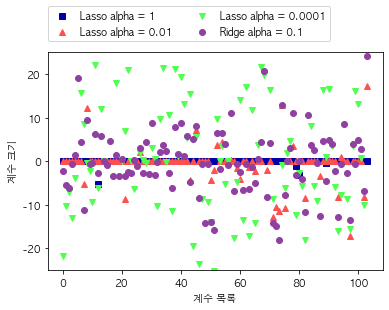

In [56]:
#도식화
lasso = Lasso(alpha = 1).fit(X_train, y_train)
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)
lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)


plt.plot(lasso.coef_, 's', label ="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label ="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label ="Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, 'o', label ="Ridge alpha = 0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

# IRIS 로지스틱 회귀 분류


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [58]:
iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
print("아이리스 데이터 모양", iris['data'].shape)
X = iris['data'][:,3:] #petal width
print(X.shape)
y = (iris['target']==2).astype(np.int) #virginica이면 1 아니면 0
print(y.shape)


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
아이리스 데이터 모양 (150, 4)
(150, 1)
(150,)


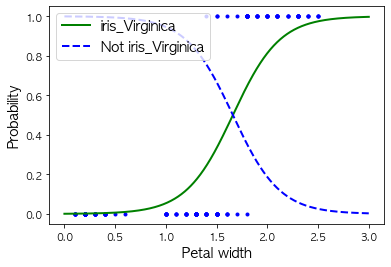

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정 확률
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_proba[:,1], "g-", label="iris_Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not iris_Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc = "upper left", fontsize=14)
plt.show()


# 로지스틱 분류, svm분류

/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


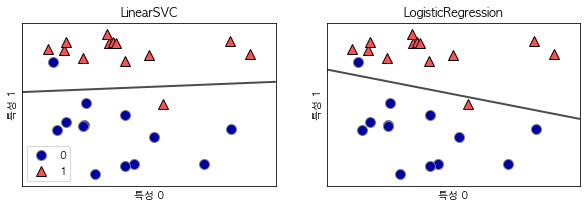

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill= False, eps = 0.5, ax = ax, alpha =.7)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

# cancer data 분류: malignant vs benign

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test =train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
for i in [1, 100, 0.01]:
    logreg = LogisticRegression(C = i, max_iter =5000).fit(X_train, y_train)
    print("Penalty" + str(i))
    print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
    print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))


Penalty1
훈련 세트 점수: 0.958
테스트 세트 점수: 0.958
Penalty100
훈련 세트 점수: 0.984
테스트 세트 점수: 0.965
Penalty0.01
훈련 세트 점수: 0.953
테스트 세트 점수: 0.951
